In [1]:
%load_ext autoreload
%autoreload 2
import torch 
import numpy as np 
import pandas as pd 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns
from natsort import natsorted
import yaml 
import os 
from prettyprinter import pprint
import matplotlib.pyplot as plt
from collections import OrderedDict
import matplotlib
%matplotlib inline
sns.set_style("whitegrid")
%config InlineBackend.figure_format='retina'
#plt.rcParams['figure.dpi'] = 100
#plt.rcParams['savefig.dpi'] = 300

sns.set_style("whitegrid")


/tmldata1/fdangelo/understanding-weight-decay/envs/ffcv_p/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def pick_colors(values,cmap = 'GnBu_r', dict = False): 
    c = np.unique(values).tolist()
    cmap = plt.cm.get_cmap(cmap, len(c))
    color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
    res = {c[i]: color_list[i] for i in range(len(c))}
    if dict: 
        return res
    else:
        return [res[v] for v in values]

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

In [4]:
from aim import Repo
from natsort import natsorted

my_repo = Repo('/tmldata1/fdangelo/understanding-weight-decay/aim_paper_2')

In [ ]:
query1 = "run.experiment == 'vgg_cifar10_base_2'"
query2 = "run.experiment == 'resnet_cifar10_figure_1'"
query3 = "run.experiment == 'resnet_cifar100_base_2'"
query4 = "run.experiment == 'resnet_cifar10_figure_norm'"

dataframe1 = my_repo.query_metrics(query1).dataframe()
dataframe2 = my_repo.query_metrics(query2).dataframe()
dataframe3 = my_repo.query_metrics(query3).dataframe()
dataframe3 = my_repo.query_metrics(query4).dataframe()

In [5]:
# (lr,wd)
plot_vgg = [(0.1,0.008),(0.1,0.0),(0.01,0.008),(0.01,0.0)]
plot_resnet10 = [(0.08,0.0125),(0.08,0.0),(0.001,0.0125),(0.001,0.0)]
plot_resnet100 = [(0.15,0.01),(0.15,0.0),(0.01,0.01),(0.01,0.0)]
plots = [plot_vgg,plot_resnet10,plot_resnet100]

In [6]:
import matplotlib.ticker as mtick

***
<div align="center"> <h1> VGG on CIFAR 10 <h1> </div>
***


In [7]:
query1 = "run.experiment in ('vgg_cifar10_base_2', 'looking_for_seeds')"
dataframe1 = my_repo.query_metrics(query1).dataframe()

  0%|          | 0/767 [00:00<?, ?it/s]

100%|██████████| 767/767 [01:26<00:00,  8.85it/s] 


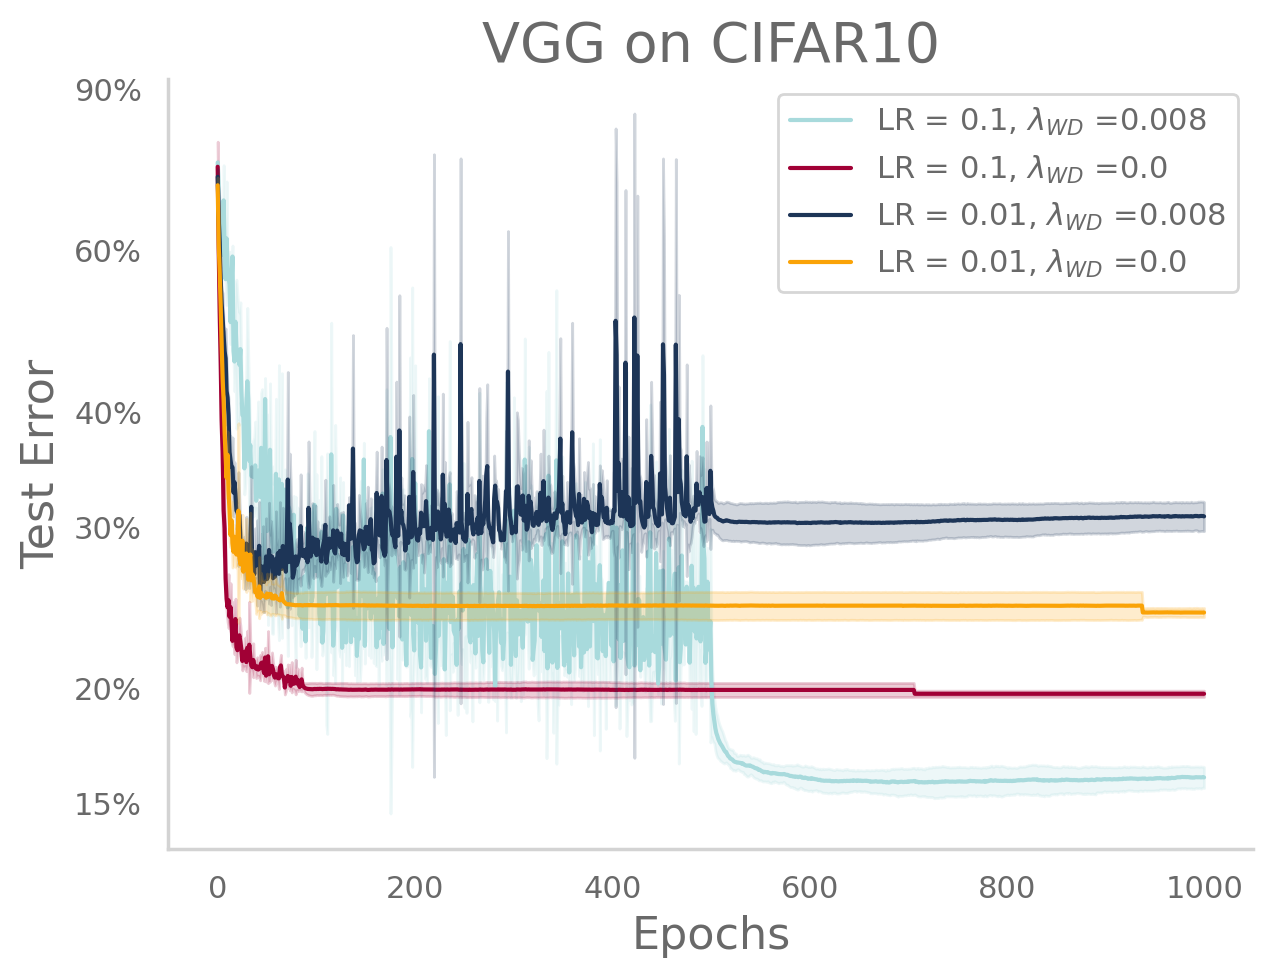

In [8]:
fig, ax = plt.subplots(1, 1,  figsize=(7, 5)) 
colors =  ['#a8dadc', '#A10035' ,'#1d3557','#faa307' ]
ax.set_xlabel('Epochs')
ax.set_ylabel('Test Error')
ax.set_title("VGG on CIFAR10")
ax.set_yscale('log')
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
ax.set_yticklabels([])
ax.set_yticks([])
#colors = pick_colors(p, cmap = 'viridis', dict = True)
for i,(lr,wd) in enumerate(plot_vgg): 
    if i ==0: 
        test_e = dataframe1.loc[
                (dataframe1['metric.name'] == 'Test Error') & (dataframe1['run.hparams.lr'] == lr) 
                & (dataframe1['run.hparams.wd'] == wd) & (dataframe1['run.hparams.random_seed'].isin([10,9,6,2,42])) 
                & (dataframe1['metric.context.subset'] == 'SDE')][['step','run.hparams.random_seed', 'value']]
    else: 
        test_e = dataframe1.loc[
            (dataframe1['metric.name'] == 'Test Error') & (dataframe1['run.hparams.lr'] == lr) 
            & (dataframe1['run.hparams.wd'] == wd) & (dataframe1['run.hparams.random_seed'].isin([42,41,40,39,38])) 
            & (dataframe1['metric.context.subset'] == 'SDE')][['step','run.hparams.random_seed', 'value']]

    #test_e = dataframe.loc[(dataframe['metric.name'] == 'Test Error') & (dataframe['run.hparams.lr'] == lr) & (dataframe['run.hparams.random_seed'] == 42) & (dataframe['run.hparams.wd'] == wd) & (dataframe['metric.context.subset'] == 'SDE')]['value'].to_numpy()
    test_e = dataframe1.loc[(dataframe1['metric.name'] == 'Test Error') & (dataframe1['run.hparams.lr'] == lr) & (dataframe1['run.hparams.wd'] == wd) & (dataframe1['run.hparams.random_seed'].isin([42,34,38, 39])) & (dataframe1['metric.context.subset'] == 'SDE')][['step','run.hparams.random_seed', 'value']]
    test_e_mean = test_e.groupby('step')['value'].mean().to_numpy()*100
    test_e_std = test_e.groupby('step')['value'].std().to_numpy()*100
    #test_ema = dataframe.loc[(dataframe['metric.name'] == 'Test Error') & (dataframe['run.hparams.lr'] == lr) & (dataframe['run.hparams.random_seed'] == 42) & (dataframe['run.hparams.wd'] == wd) & (dataframe['metric.context.subset'] == 'ema')]['value'].to_numpy()
    ax.plot(test_e_mean, label = f'LR = {lr},' ' $\lambda_{WD}$ =' f'{wd}', color = colors[i])
    #ax.plot(test_ema, label = f'EMA lr = {lr}, wd = {wd}', color = colors[i], linestyle = '--')
    ax.fill_between(np.arange(test_e_mean.shape[0]), test_e_mean + test_e_std,test_e_mean - test_e_std, color = colors[i], alpha=0.2, zorder=i)
    ax.legend()

ytick_locs_1 = [15, 20,30,40, 60, 90]

# # Set the y-tick locations and labels
ax.set_yticks(ytick_locs_1)
ax.set_yticklabels([str(int(loc)) for loc in ytick_locs_1])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [9]:
fig.savefig('/tmldata1/fdangelo/understanding-weight-decay/plots_paper/vgg_cifar10.pdf', format='pdf', bbox_inches='tight')

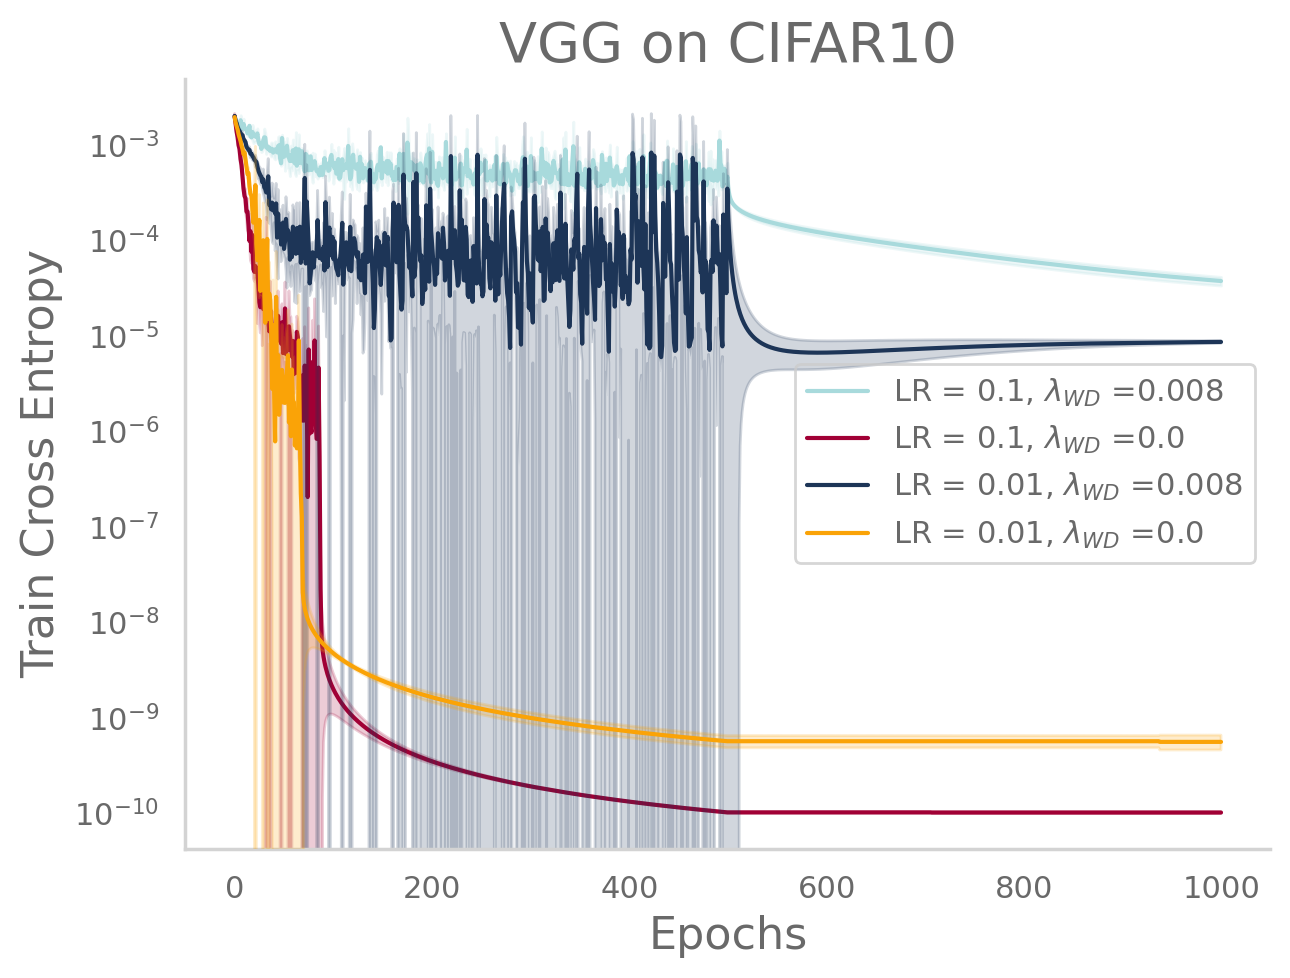

In [12]:
fig, ax = plt.subplots(1, 1,  figsize=(7, 5)) 
colors =  ['#a8dadc', '#A10035' ,'#1d3557','#faa307' ]
ax.set_xlabel('Epochs')
ax.set_ylabel('Train Cross Entropy')
ax.set_title("VGG on CIFAR10")
ax.set_yscale('log')
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
# ax.set_yticklabels([])
# ax.set_yticks([])
#colors = pick_colors(p, cmap = 'viridis', dict = True)
for i,(lr,wd) in enumerate(plot_vgg): 
    if i ==0: 
        test_e = dataframe1.loc[
                (dataframe1['metric.name'] == 'Train Cross Entropy') & (dataframe1['run.hparams.lr'] == lr) 
                & (dataframe1['run.hparams.wd'] == wd) & (dataframe1['run.hparams.random_seed'].isin([10,9,6,2,42])) 
                & (dataframe1['metric.context.subset'] == 'SDE')][['step','run.hparams.random_seed', 'value']]
    else: 
        test_e = dataframe1.loc[
            (dataframe1['metric.name'] == 'Train Cross Entropy') & (dataframe1['run.hparams.lr'] == lr) 
            & (dataframe1['run.hparams.wd'] == wd) & (dataframe1['run.hparams.random_seed'].isin([42,41,40,39,38])) 
            & (dataframe1['metric.context.subset'] == 'SDE')][['step','run.hparams.random_seed', 'value']]

    #test_e = dataframe.loc[(dataframe['metric.name'] == 'Test Error') & (dataframe['run.hparams.lr'] == lr) & (dataframe['run.hparams.random_seed'] == 42) & (dataframe['run.hparams.wd'] == wd) & (dataframe['metric.context.subset'] == 'SDE')]['value'].to_numpy()
    test_e = dataframe1.loc[(dataframe1['metric.name'] == 'Train Cross Entropy') & (dataframe1['run.hparams.lr'] == lr) & (dataframe1['run.hparams.wd'] == wd) & (dataframe1['run.hparams.random_seed'].isin([42,34,38, 39])) & (dataframe1['metric.context.subset'] == 'SDE')][['step','run.hparams.random_seed', 'value']]
    test_e_mean = test_e.groupby('step')['value'].mean().to_numpy()
    test_e_std = test_e.groupby('step')['value'].std().to_numpy()
    #test_ema = dataframe.loc[(dataframe['metric.name'] == 'Test Error') & (dataframe['run.hparams.lr'] == lr) & (dataframe['run.hparams.random_seed'] == 42) & (dataframe['run.hparams.wd'] == wd) & (dataframe['metric.context.subset'] == 'ema')]['value'].to_numpy()
    ax.plot(test_e_mean, label = f'LR = {lr},' ' $\lambda_{WD}$ =' f'{wd}', color = colors[i])
    #ax.plot(test_ema, label = f'EMA lr = {lr}, wd = {wd}', color = colors[i], linestyle = '--')
    ax.fill_between(np.arange(test_e_mean.shape[0]), test_e_mean + test_e_std,test_e_mean - test_e_std, color = colors[i], alpha=0.2, zorder=i)
    ax.legend()

# ytick_locs_1 = [15, 20,30,40, 60, 90]

# # # Set the y-tick locations and labels
# ax.set_yticks(ytick_locs_1)
# ax.set_yticklabels([str(int(loc)) for loc in ytick_locs_1])
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [13]:
fig.savefig('/tmldata1/fdangelo/understanding-weight-decay/plots_paper/vgg_cifar10_train_CE.pdf', format='pdf', bbox_inches='tight')

***
<div align="center"> <h1> Resnet on cifar 10 Figure  <h1> </div>


In [14]:
query2 = "run.experiment == 'resnet_cifar10_figure_1'"
dataframe2 = my_repo.query_metrics(query2).dataframe()

 30%|██▉       | 229/767 [00:02<00:08, 63.64it/s] 

100%|██████████| 767/767 [00:31<00:00, 24.54it/s] 


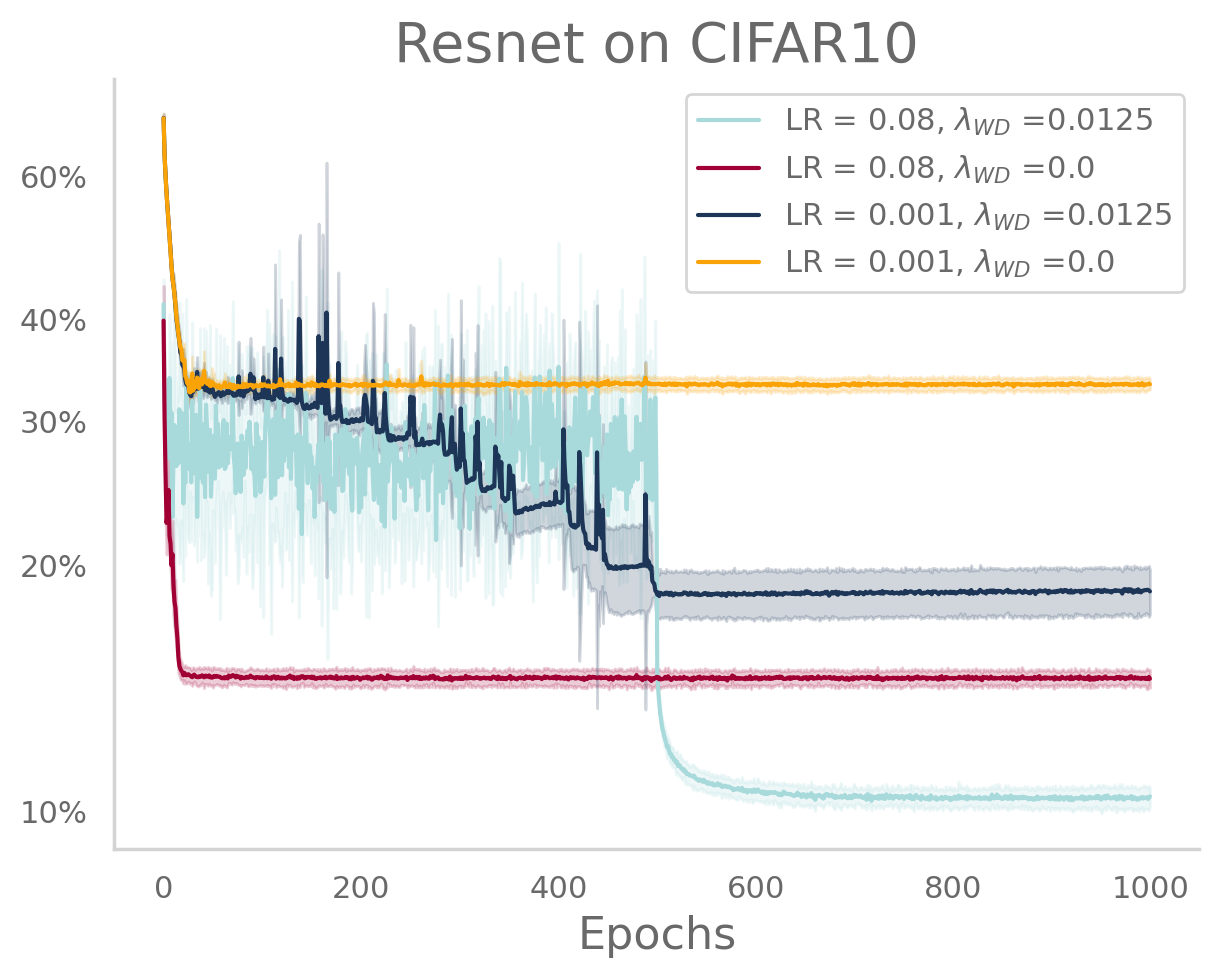

In [15]:
fig, ax = plt.subplots(1, 1,  figsize=(7, 5)) 
colors =  ['#a8dadc', '#A10035' ,'#1d3557','#faa307' ]
ax.set_yscale('log')
ax.set_xlabel('Epochs')
ax.set_title("Resnet on CIFAR10")
#colors = pick_colors(p, cmap = 'viridis', dict = True)
for i,(lr,wd) in enumerate(plot_resnet10): 
    #test_e = dataframe.loc[(dataframe['metric.name'] == 'Test Error') & (dataframe['run.hparams.lr'] == lr) & (dataframe['run.hparams.random_seed'] == 42) & (dataframe['run.hparams.wd'] == wd) & (dataframe['metric.context.subset'] == 'SDE')]['value'].to_numpy()
    test_e = dataframe2.loc[(dataframe2['metric.name'] == 'Test Error') & (dataframe2['run.hparams.lr'] == lr) & (dataframe2['run.hparams.wd'] == wd) & (dataframe2['metric.context.subset'] == 'SDE')][['step','run.hparams.random_seed', 'value']]
    test_e_mean = test_e.groupby('step')['value'].mean().to_numpy()*100
    test_e_std = test_e.groupby('step')['value'].std().to_numpy()*100
    #test_ema = dataframe.loc[(dataframe['metric.name'] == 'Test Error') & (dataframe['run.hparams.lr'] == lr) & (dataframe['run.hparams.random_seed'] == 42) & (dataframe['run.hparams.wd'] == wd) & (dataframe['metric.context.subset'] == 'ema')]['value'].to_numpy()
    ax.plot(test_e_mean, label = f'LR = {lr},' ' $\lambda_{WD}$ =' f'{wd}', color = colors[i])
    #ax.plot(test_ema, label = f'EMA lr = {lr}, wd = {wd}', color = colors[i], linestyle = '--')
    ax.fill_between(np.arange(test_e_mean.shape[0]), test_e_mean + test_e_std,test_e_mean - test_e_std, color = colors[i], alpha=0.2)
    ax.legend()
ytick_locs_1 = [10, 20,30,40, 60]

# # Set the y-tick locations and labels
ax.set_yticks(ytick_locs_1)
ax.set_yticklabels([str(int(loc)) for loc in ytick_locs_1])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [16]:
fig.savefig('/tmldata1/fdangelo/understanding-weight-decay/plots_paper/resnet_cifar10.pdf', format='pdf', bbox_inches='tight')

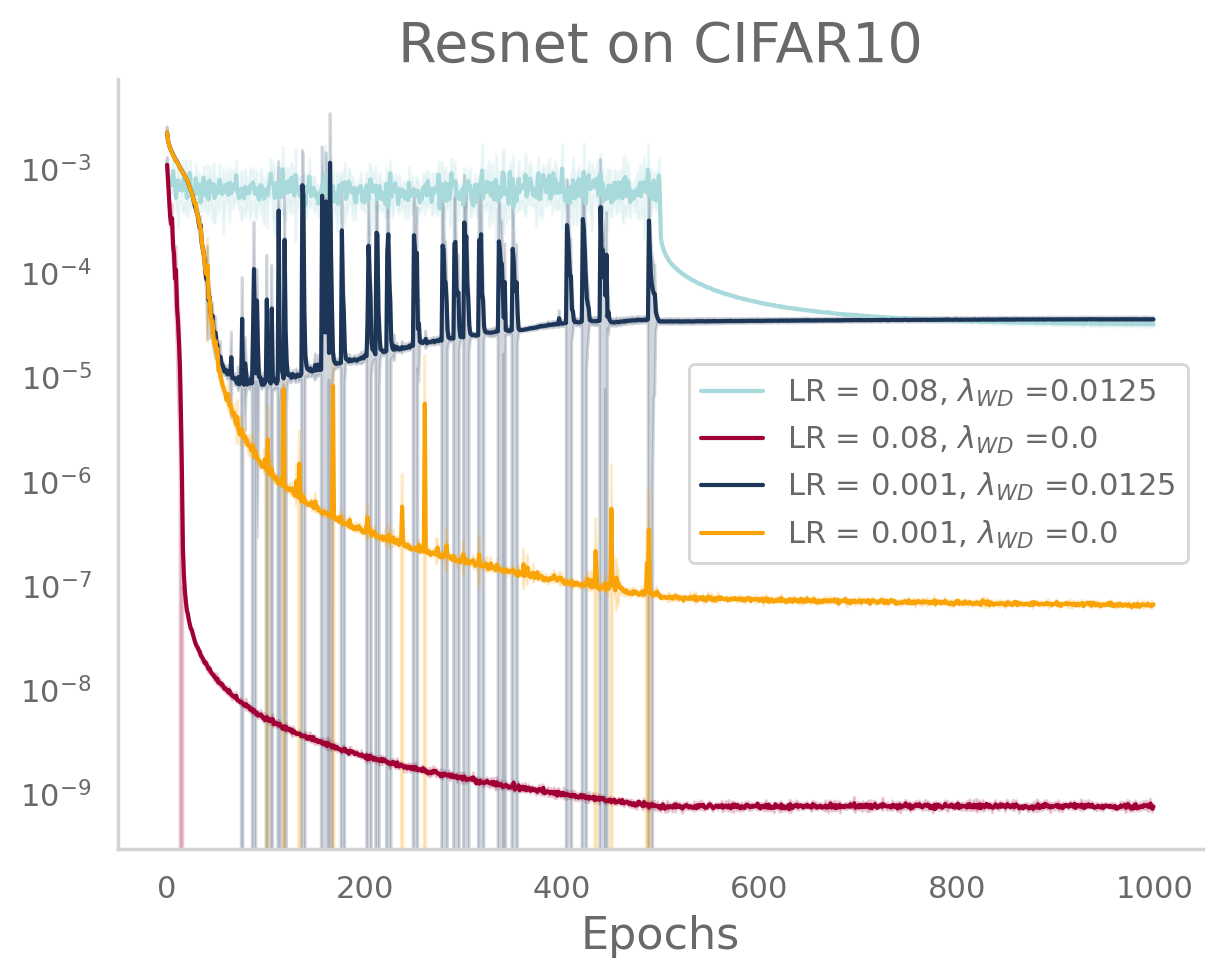

In [17]:
fig, ax = plt.subplots(1, 1,  figsize=(7, 5)) 
colors =  ['#a8dadc', '#A10035' ,'#1d3557','#faa307' ]
ax.set_yscale('log')
ax.set_xlabel('Epochs')
ax.set_title("Resnet on CIFAR10")
#colors = pick_colors(p, cmap = 'viridis', dict = True)
for i,(lr,wd) in enumerate(plot_resnet10): 
    #test_e = dataframe.loc[(dataframe['metric.name'] == 'Test Error') & (dataframe['run.hparams.lr'] == lr) & (dataframe['run.hparams.random_seed'] == 42) & (dataframe['run.hparams.wd'] == wd) & (dataframe['metric.context.subset'] == 'SDE')]['value'].to_numpy()
    test_e = dataframe2.loc[(dataframe2['metric.name'] == 'Train Cross Entropy') & (dataframe2['run.hparams.lr'] == lr) & (dataframe2['run.hparams.wd'] == wd) & (dataframe2['metric.context.subset'] == 'SDE')][['step','run.hparams.random_seed', 'value']]
    test_e_mean = test_e.groupby('step')['value'].mean().to_numpy()
    test_e_std = test_e.groupby('step')['value'].std().to_numpy()
    #test_ema = dataframe.loc[(dataframe['metric.name'] == 'Test Error') & (dataframe['run.hparams.lr'] == lr) & (dataframe['run.hparams.random_seed'] == 42) & (dataframe['run.hparams.wd'] == wd) & (dataframe['metric.context.subset'] == 'ema')]['value'].to_numpy()
    ax.plot(test_e_mean, label = f'LR = {lr},' ' $\lambda_{WD}$ =' f'{wd}', color = colors[i])
    #ax.plot(test_ema, label = f'EMA lr = {lr}, wd = {wd}', color = colors[i], linestyle = '--')
    ax.fill_between(np.arange(test_e_mean.shape[0]), test_e_mean + test_e_std,test_e_mean - test_e_std, color = colors[i], alpha=0.2)
    ax.legend()
# ytick_locs_1 = [10, 20,30,40, 60]

# # # Set the y-tick locations and labels
# ax.set_yticks(ytick_locs_1)
# ax.set_yticklabels([str(int(loc)) for loc in ytick_locs_1])
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [18]:
fig.savefig('/tmldata1/fdangelo/understanding-weight-decay/plots_paper/resnet_cifar10_train_CE.pdf', format='pdf', bbox_inches='tight')

***
<div align="center"> <h1> Resnet on cifar 100 Figure  <h1> </div>

In [19]:
query3 = "run.experiment == 'resnet_cifar100_figure_1'"
dataframe3 = my_repo.query_metrics(query3).dataframe()
plot_resnet100 = [(0.15,0.01),(0.15,0.0),(0.001,0.01),(0.001,0.0)]

  0%|          | 0/767 [00:00<?, ?it/s]

100%|██████████| 767/767 [00:14<00:00, 53.84it/s] 


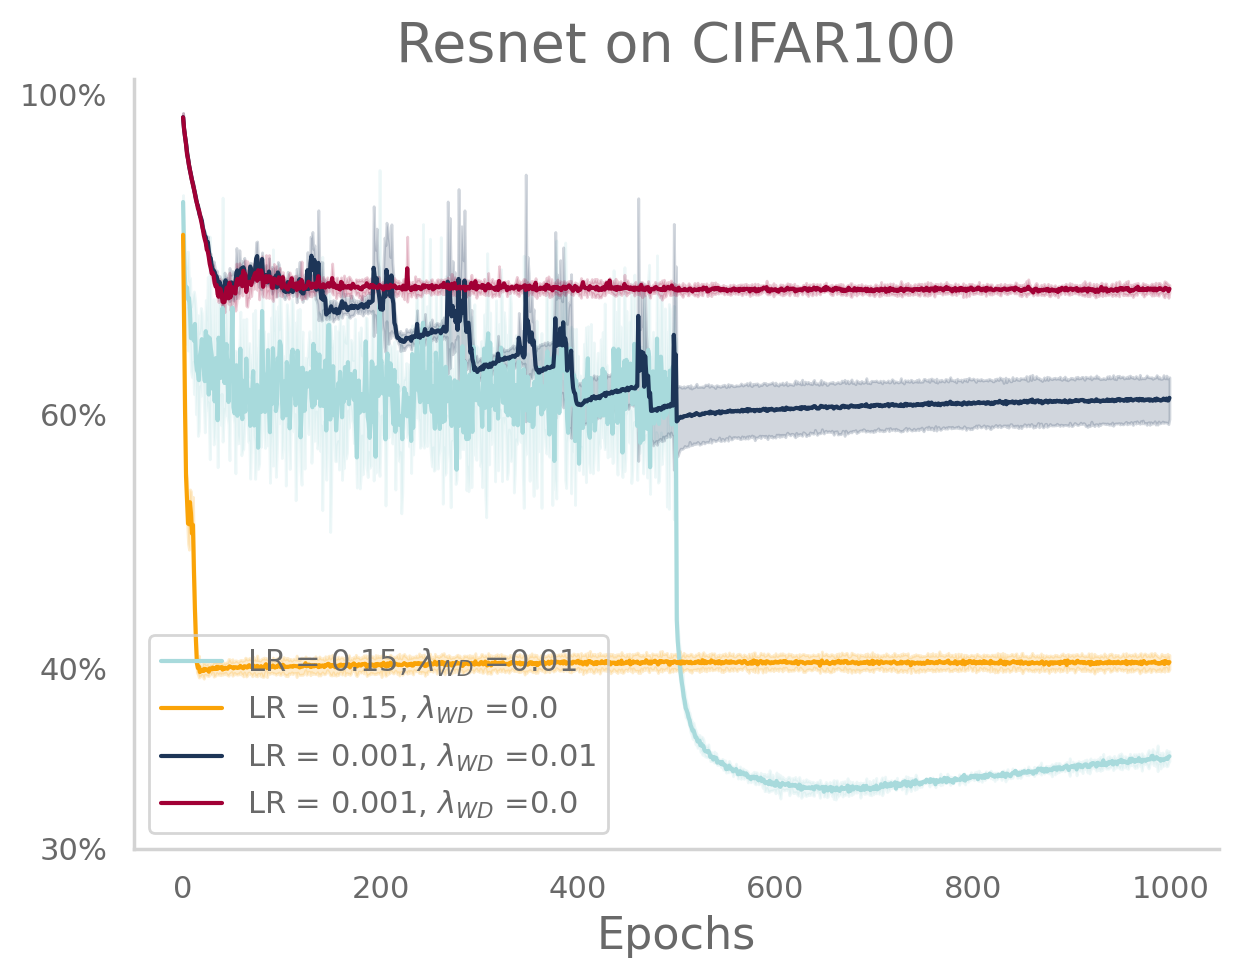

In [20]:
fig, ax = plt.subplots(1, 1,  figsize=(7, 5)) 
colors =  ['#a8dadc', '#faa307','#1d3557' ,  '#A10035' ]
ax.set_yscale('log')
ax.set_xlabel('Epochs')
ax.set_title("Resnet on CIFAR100")
#colors = pick_colors(p, cmap = 'viridis', dict = True)
for i,(lr,wd) in enumerate(plot_resnet100): 
    #test_e = dataframe.loc[(dataframe['metric.name'] == 'Test Error') & (dataframe['run.hparams.lr'] == lr) & (dataframe['run.hparams.random_seed'] == 42) & (dataframe['run.hparams.wd'] == wd) & (dataframe['metric.context.subset'] == 'SDE')]['value'].to_numpy()
    test_e = dataframe3.loc[(dataframe3['metric.name'] == 'Test Error') 
                            & (dataframe3['run.hparams.lr'] == lr) 
                            & (dataframe3['run.hparams.wd'] == wd) 
                            & (dataframe3['metric.context.subset'] == 'SDE')][['step','run.hparams.random_seed', 'value']]
    test_e_mean = test_e.groupby('step')['value'].mean().to_numpy()*100
    test_e_std = test_e.groupby('step')['value'].std().to_numpy()*100
    #test_ema = dataframe.loc[(dataframe['metric.name'] == 'Test Error') & (dataframe['run.hparams.lr'] == lr) & (dataframe['run.hparams.random_seed'] == 42) & (dataframe['run.hparams.wd'] == wd) & (dataframe['metric.context.subset'] == 'ema')]['value'].to_numpy()
    ax.plot(test_e_mean, label = f'LR = {lr},' ' $\lambda_{WD}$ =' f'{wd}', color = colors[i])
    #ax.plot(test_ema, label = f'EMA lr = {lr}, wd = {wd}', color = colors[i], linestyle = '--')
    ax.fill_between(np.arange(test_e_mean.shape[0]), test_e_mean + test_e_std,test_e_mean - test_e_std, color = colors[i], alpha=0.2)
    ax.legend()
ytick_locs_1 = [30,40,60, 100]

# # Set the y-tick locations and labels
ax.set_yticks(ytick_locs_1)
ax.set_yticklabels([str(int(loc)) for loc in ytick_locs_1])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


In [21]:
fig.savefig('/tmldata1/fdangelo/understanding-weight-decay/plots_paper/resnet_cifar100.pdf', format='pdf', bbox_inches='tight')

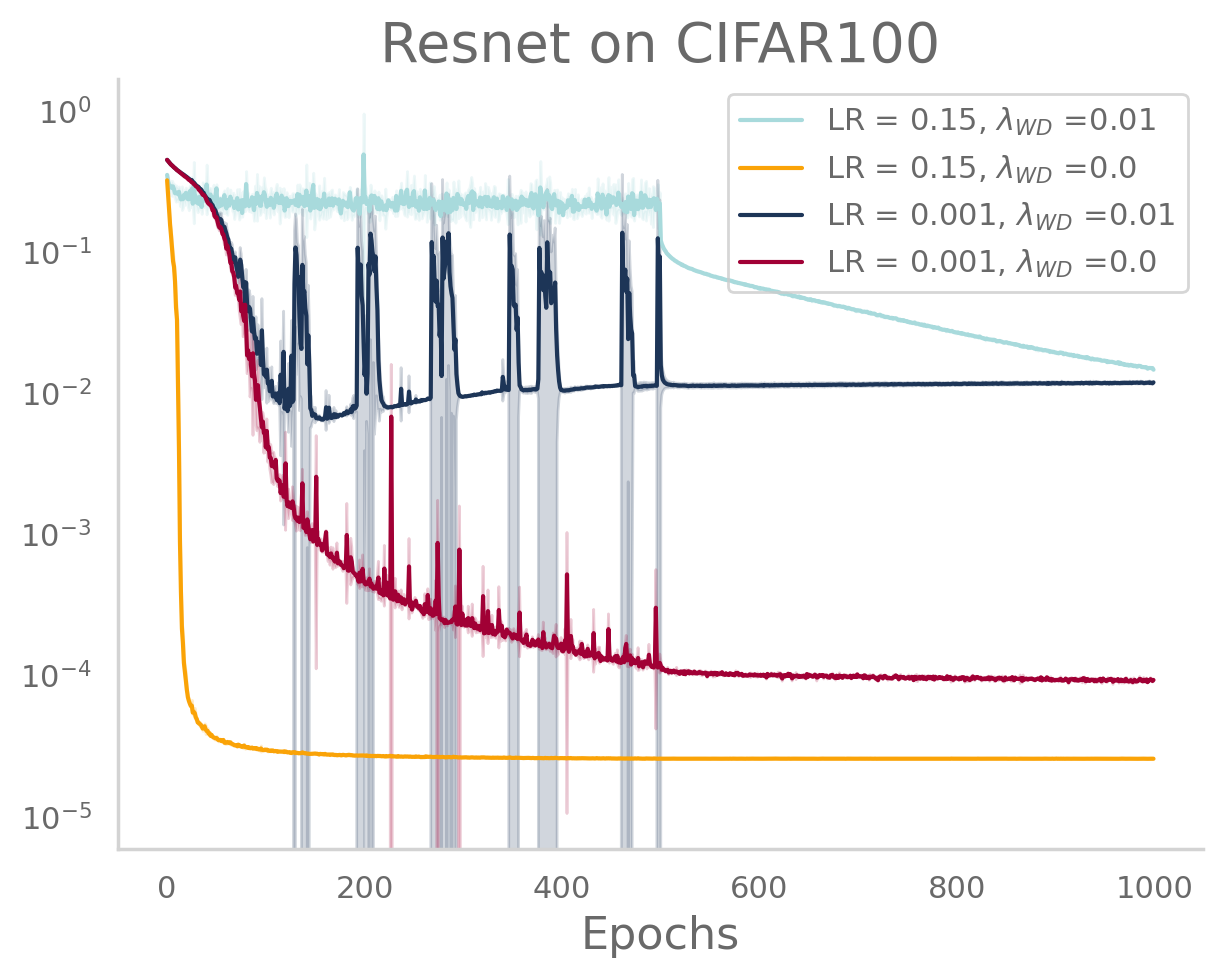

In [22]:
fig, ax = plt.subplots(1, 1,  figsize=(7, 5)) 
colors =  ['#a8dadc', '#faa307','#1d3557' ,  '#A10035' ]
ax.set_yscale('log')
ax.set_xlabel('Epochs')
ax.set_title("Resnet on CIFAR100")
#colors = pick_colors(p, cmap = 'viridis', dict = True)
for i,(lr,wd) in enumerate(plot_resnet100): 
    #test_e = dataframe.loc[(dataframe['metric.name'] == 'Test Error') & (dataframe['run.hparams.lr'] == lr) & (dataframe['run.hparams.random_seed'] == 42) & (dataframe['run.hparams.wd'] == wd) & (dataframe['metric.context.subset'] == 'SDE')]['value'].to_numpy()
    test_e = dataframe3.loc[(dataframe3['metric.name'] == 'Train Cross Entropy') 
                            & (dataframe3['run.hparams.lr'] == lr) 
                            & (dataframe3['run.hparams.wd'] == wd) 
                            & (dataframe3['metric.context.subset'] == 'SDE')][['step','run.hparams.random_seed', 'value']]
    test_e_mean = test_e.groupby('step')['value'].mean().to_numpy()*100
    test_e_std = test_e.groupby('step')['value'].std().to_numpy()*100
    #test_ema = dataframe.loc[(dataframe['metric.name'] == 'Test Error') & (dataframe['run.hparams.lr'] == lr) & (dataframe['run.hparams.random_seed'] == 42) & (dataframe['run.hparams.wd'] == wd) & (dataframe['metric.context.subset'] == 'ema')]['value'].to_numpy()
    ax.plot(test_e_mean, label = f'LR = {lr},' ' $\lambda_{WD}$ =' f'{wd}', color = colors[i])
    #ax.plot(test_ema, label = f'EMA lr = {lr}, wd = {wd}', color = colors[i], linestyle = '--')
    ax.fill_between(np.arange(test_e_mean.shape[0]), test_e_mean + test_e_std,test_e_mean - test_e_std, color = colors[i], alpha=0.2)
    ax.legend()
# ytick_locs_1 = [30,40,60, 100]

# # # Set the y-tick locations and labels
# ax.set_yticks(ytick_locs_1)
# ax.set_yticklabels([str(int(loc)) for loc in ytick_locs_1])
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())


In [23]:
fig.savefig('/tmldata1/fdangelo/understanding-weight-decay/plots_paper/resnet_cifar100_train_CE.pdf', format='pdf', bbox_inches='tight')

***
<div align="center"> <h1> Resnet norm cifar 10  <h1> </div>

In [8]:
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker
plt.rcParams['text.usetex'] = True

In [5]:
query4 = "run.experiment == 'resnet_cifar10_figure_norm_2'"
dataframe4 = my_repo.query_metrics(query4).dataframe()
plot_resnet100 = [(0.15,0.015),(0.2,0.015),(0.1,0.015)]

100%|██████████| 776/776 [00:09<00:00, 82.20it/s] 


In [7]:
plot_norm = [(0.15,0.015),(0.2,0.015),(0.1,0.015)]

NameError: name 'mtick' is not defined

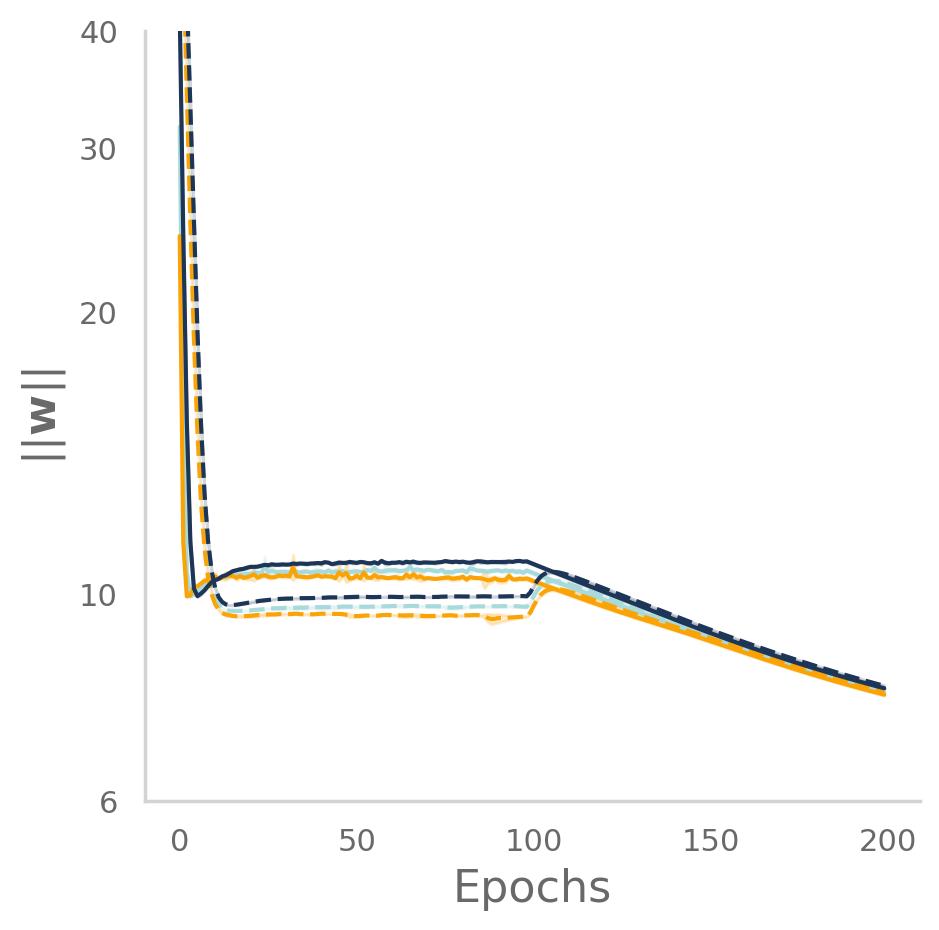

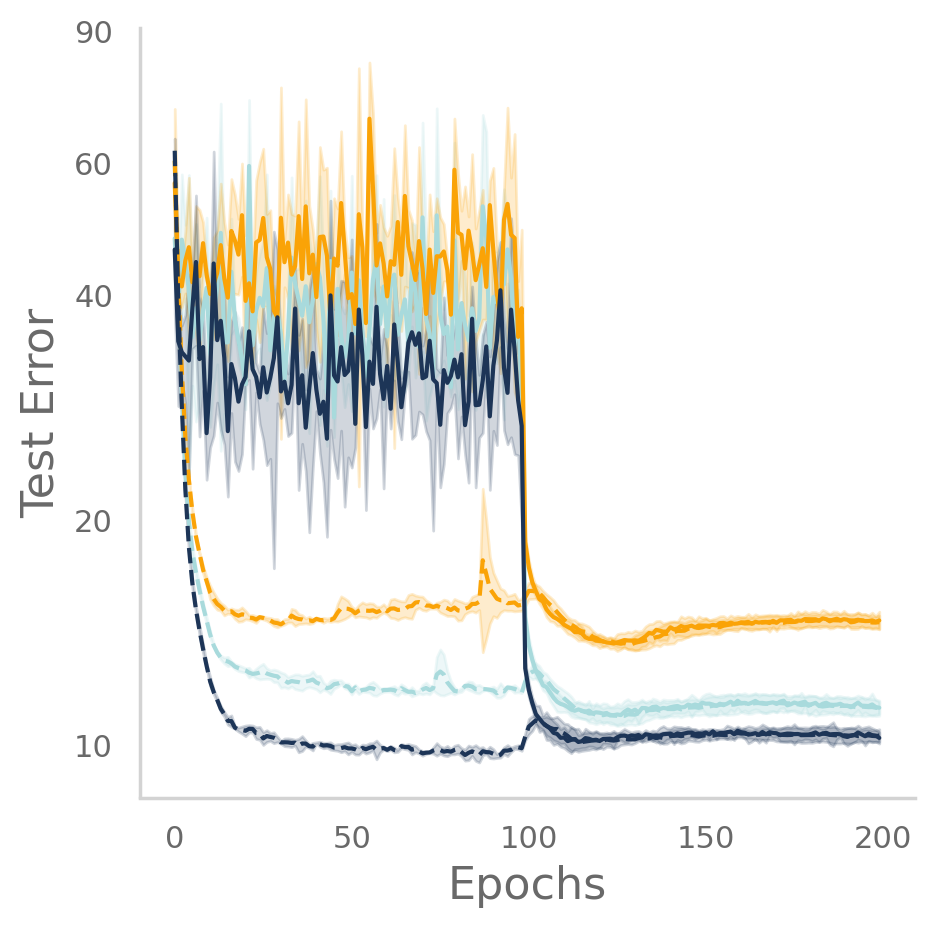

In [8]:
fig_1, ax_1 = plt.subplots(1, 1,  figsize=(5, 5)) 
fig_2, ax_2 = plt.subplots(1, 1,  figsize=(5, 5)) 
colors =  ['#a8dadc', '#faa307','#1d3557' ,  '#e63946' ]
#fig.suptitle('Resnet on CIFAR10')
#axs[0].set_yscale('log')
ax_1.set_yscale('log')
ax_2.set_yscale('log')
ax_1.set_xlabel('Epochs')
ax_2.set_xlabel('Epochs')
ax_1.set_ylabel('$||\mathbf{w}||$')
ax_1.set_ylim(6,40)
ax_2.set_ylabel('Test Error')

for i,(lr,wd) in enumerate(plot_norm): 
    #test_e = dataframe.loc[(dataframe['metric.name'] == 'Test Error') & (dataframe['run.hparams.lr'] == lr) & (dataframe['run.hparams.random_seed'] == 42) & (dataframe['run.hparams.wd'] == wd) & (dataframe['metric.context.subset'] == 'SDE')]['value'].to_numpy()
    test_e = dataframe4.loc[(dataframe4['metric.name'] == 'Test Error') 
                            & (dataframe4['run.hparams.lr'] == lr) 
                            & (dataframe4['run.hparams.wd'] == wd) 
                            & (dataframe4['metric.context.subset'] == 'SDE')][['step','run.hparams.random_seed' ,'value']]
    l2 = dataframe4.loc[(dataframe4['metric.name'] == 'L2') 
                            & (dataframe4['run.hparams.lr'] == lr) 
                            & (dataframe4['run.hparams.wd'] == wd) 
                            & (dataframe4['metric.context.subset'] == 'SDE')][['step','run.hparams.random_seed' ,'value']]
    test_e_mean = test_e.groupby('step')['value'].mean().to_numpy()[:200]*100
    test_e_std = test_e.groupby('step')['value'].std().to_numpy()[:200]*100
    l2_mean = l2.groupby('step')['value'].mean().to_numpy()[:200]
    l2_std = l2.groupby('step')['value'].std().to_numpy()[:200]
    ax_2.plot(test_e_mean, label = f'lr = {lr}', color = colors[i])
    ax_1.plot(l2_mean, label = f'lr = {lr}', color = colors[i])
    ax_2.fill_between(np.arange(test_e_mean.shape[0]), test_e_mean + test_e_std,test_e_mean - test_e_std, color = colors[i], alpha=0.2)
    ax_1.fill_between(np.arange(l2_mean.shape[0]), l2_mean + l2_std,l2_mean - l2_std, color = colors[i], alpha=0.2)

    test_ema = dataframe4.loc[(dataframe4['metric.name'] == 'Test Error') 
                            & (dataframe4['run.hparams.lr'] == lr) 
                            & (dataframe4['run.hparams.wd'] == wd) 
                            & (dataframe4['metric.context.subset'] == 'ema')][['step','run.hparams.random_seed' ,'value']]
    l2_ema = dataframe4.loc[(dataframe4['metric.name'] == 'L2') 
                            & (dataframe4['run.hparams.lr'] == lr) 
                            & (dataframe4['run.hparams.wd'] == wd) 
                            & (dataframe4['metric.context.subset'] == 'ema')][['step','run.hparams.random_seed' ,'value']]
    
    test_e_mean_ema = test_ema.groupby('step')['value'].mean().to_numpy()[:200]*100
    test_e_std_ema = test_ema.groupby('step')['value'].std().to_numpy()[:200]*100
    l2_mean_ema = l2_ema.groupby('step')['value'].mean().to_numpy()[:200]
    l2_std_ema = l2_ema.groupby('step')['value'].std().to_numpy()[:200]
    ax_2.plot(test_e_mean_ema, label = f'lr = {lr}', color = colors[i], ls='--')
    ax_1.plot(l2_mean_ema, label = f'EMA lr = {lr}', color = colors[i], ls='--')
    ax_2.fill_between(np.arange(test_e_mean_ema.shape[0]), test_e_mean_ema + test_e_std_ema,test_e_mean_ema - test_e_std_ema, color = colors[i], alpha=0.2)
    ax_1.fill_between(np.arange(l2_mean_ema.shape[0]), l2_mean_ema + l2_std_ema,l2_mean_ema - l2_std_ema, color = colors[i], alpha=0.2)

#axs[0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
ytick_locs_0 = [6, 10, 20, 30, 40]
ytick_locs_1 = [10, 20, 40, 60, 90]

# Set the y-tick locations and labels
ax_1.set_yticks(ytick_locs_0)
ax_1.set_yticklabels([str(int(loc)) for loc in ytick_locs_0])
ax_2.set_yticks(ytick_locs_1)
ax_2.set_yticklabels([str(loc) for loc in ytick_locs_1])
ax_2.yaxis.set_major_formatter(mtick.PercentFormatter())
handles, labels = ax_1.get_legend_handles_labels()
order = [4,0,2,5,1,3]
ax_1.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

In [28]:
fig_1.savefig('/tmldata1/fdangelo/understanding-weight-decay/plots_paper/norm_cifar_10.pdf', format='pdf', bbox_inches='tight')
fig_2.savefig('/tmldata1/fdangelo/understanding-weight-decay/plots_paper/test_e_cifar10.pdf', format='pdf', bbox_inches='tight')

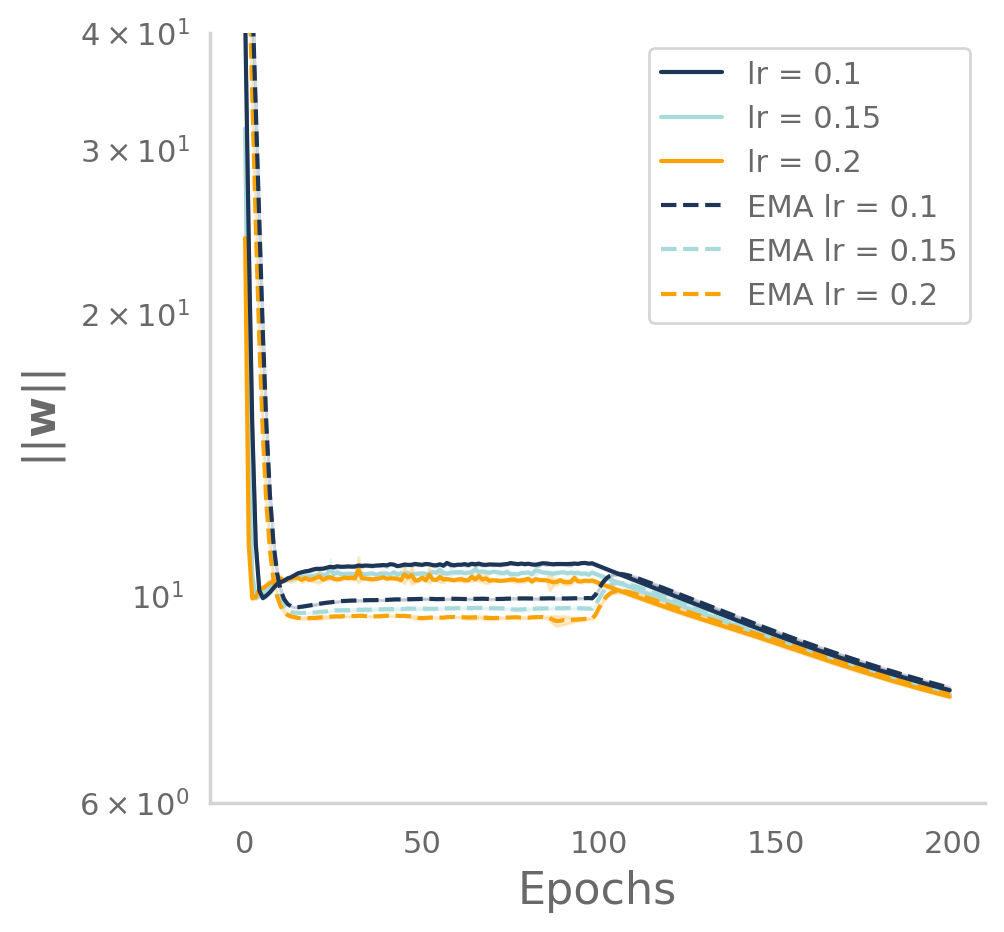

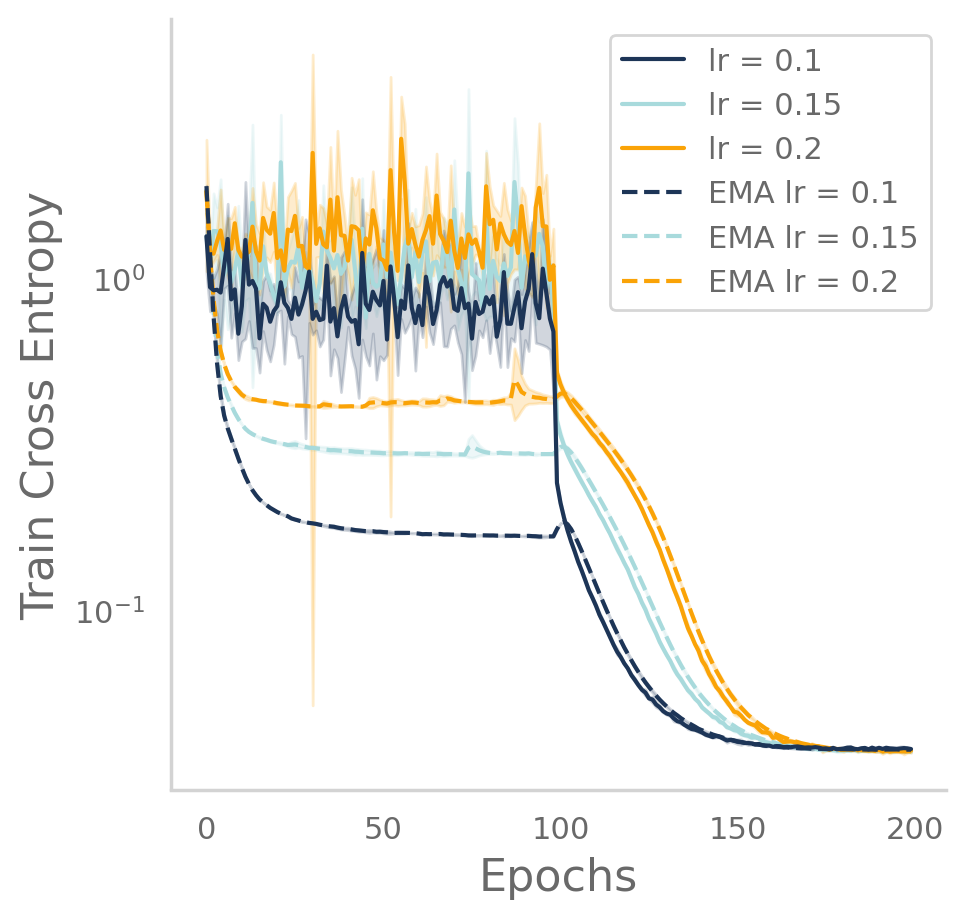

In [9]:
fig_1, ax_1 = plt.subplots(1, 1,  figsize=(5, 5)) 
fig_2, ax_2 = plt.subplots(1, 1,  figsize=(5, 5)) 
colors =  ['#a8dadc', '#faa307','#1d3557' ,  '#e63946' ]
#fig.suptitle('Resnet on CIFAR10')
#axs[0].set_yscale('log')
ax_1.set_yscale('log')
ax_2.set_yscale('log')
ax_1.set_xlabel('Epochs')
ax_2.set_xlabel('Epochs')
ax_1.set_ylabel('$||\mathbf{w}||$')
ax_1.set_ylim(6,40)
ax_2.set_ylabel('Train Cross Entropy')

for i,(lr,wd) in enumerate(plot_norm): 
    #test_e = dataframe.loc[(dataframe['metric.name'] == 'Test Error') & (dataframe['run.hparams.lr'] == lr) & (dataframe['run.hparams.random_seed'] == 42) & (dataframe['run.hparams.wd'] == wd) & (dataframe['metric.context.subset'] == 'SDE')]['value'].to_numpy()
    test_e = dataframe4.loc[(dataframe4['metric.name'] == 'Train Cross Entropy') 
                            & (dataframe4['run.hparams.lr'] == lr) 
                            & (dataframe4['run.hparams.wd'] == wd) 
                            & (dataframe4['metric.context.subset'] == 'SDE')][['step','run.hparams.random_seed' ,'value']]
    l2 = dataframe4.loc[(dataframe4['metric.name'] == 'L2') 
                            & (dataframe4['run.hparams.lr'] == lr) 
                            & (dataframe4['run.hparams.wd'] == wd) 
                            & (dataframe4['metric.context.subset'] == 'SDE')][['step','run.hparams.random_seed' ,'value']]
    test_e_mean = test_e.groupby('step')['value'].mean().to_numpy()[:200]
    test_e_std = test_e.groupby('step')['value'].std().to_numpy()[:200]
    l2_mean = l2.groupby('step')['value'].mean().to_numpy()[:200]
    l2_std = l2.groupby('step')['value'].std().to_numpy()[:200]
    ax_2.plot(test_e_mean, label = f'lr = {lr}', color = colors[i])
    ax_1.plot(l2_mean, label = f'lr = {lr}', color = colors[i])
    ax_2.fill_between(np.arange(test_e_mean.shape[0]), test_e_mean + test_e_std,test_e_mean - test_e_std, color = colors[i], alpha=0.2)
    ax_1.fill_between(np.arange(l2_mean.shape[0]), l2_mean + l2_std,l2_mean - l2_std, color = colors[i], alpha=0.2)

    test_ema = dataframe4.loc[(dataframe4['metric.name'] == 'Train Cross Entropy') 
                            & (dataframe4['run.hparams.lr'] == lr) 
                            & (dataframe4['run.hparams.wd'] == wd) 
                            & (dataframe4['metric.context.subset'] == 'ema')][['step','run.hparams.random_seed' ,'value']]
    l2_ema = dataframe4.loc[(dataframe4['metric.name'] == 'L2') 
                            & (dataframe4['run.hparams.lr'] == lr) 
                            & (dataframe4['run.hparams.wd'] == wd) 
                            & (dataframe4['metric.context.subset'] == 'ema')][['step','run.hparams.random_seed' ,'value']]
    
    test_e_mean_ema = test_ema.groupby('step')['value'].mean().to_numpy()[:200]
    test_e_std_ema = test_ema.groupby('step')['value'].std().to_numpy()[:200]
    l2_mean_ema = l2_ema.groupby('step')['value'].mean().to_numpy()[:200]
    l2_std_ema = l2_ema.groupby('step')['value'].std().to_numpy()[:200]
    ax_2.plot(test_e_mean_ema, label = f'lr = {lr}', color = colors[i], ls='--')
    ax_1.plot(l2_mean_ema, label = f'EMA lr = {lr}', color = colors[i], ls='--')
    ax_2.fill_between(np.arange(test_e_mean_ema.shape[0]), test_e_mean_ema + test_e_std_ema,test_e_mean_ema - test_e_std_ema, color = colors[i], alpha=0.2)
    ax_1.fill_between(np.arange(l2_mean_ema.shape[0]), l2_mean_ema + l2_std_ema,l2_mean_ema - l2_std_ema, color = colors[i], alpha=0.2)

#axs[0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
# ytick_locs_0 = [6, 10, 20, 30, 40]
# ytick_locs_1 = [10, 20, 40, 60, 90]

# # Set the y-tick locations and labels
# ax_1.set_yticks(ytick_locs_0)
# ax_1.set_yticklabels([str(int(loc)) for loc in ytick_locs_0])
# ax_2.set_yticks(ytick_locs_1)
# ax_2.set_yticklabels([str(loc) for loc in ytick_locs_1])
# ax_2.yaxis.set_major_formatter(mtick.PercentFormatter())
handles, labels = ax_1.get_legend_handles_labels()
order = [4,0,2,5,1,3]
ax_1.legend([handles[idx] for idx in order], [labels[idx] for idx in order])
ax_2.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

In [30]:
fig_2.savefig('/tmldata1/fdangelo/understanding-weight-decay/plots_paper/train_CE_cifar10.pdf', format='pdf', bbox_inches='tight')

***
<div align="center"> <h1> Trace of Hessian plot  <h1> </div>

In [31]:
query5 = "run.experiment == 'resnet_cifar10_traceh_every_epoch'"
dataframe5 = my_repo.query_metrics(query5).dataframe()

  0%|          | 0/767 [00:00<?, ?it/s]

100%|██████████| 767/767 [00:31<00:00, 24.61it/s] 


In [66]:
matplotlib.rcParams['text.usetex']=True

In [32]:
plots_traceh = [(0.15,0.015),(0.2,0.015),(0.1,0.015)]

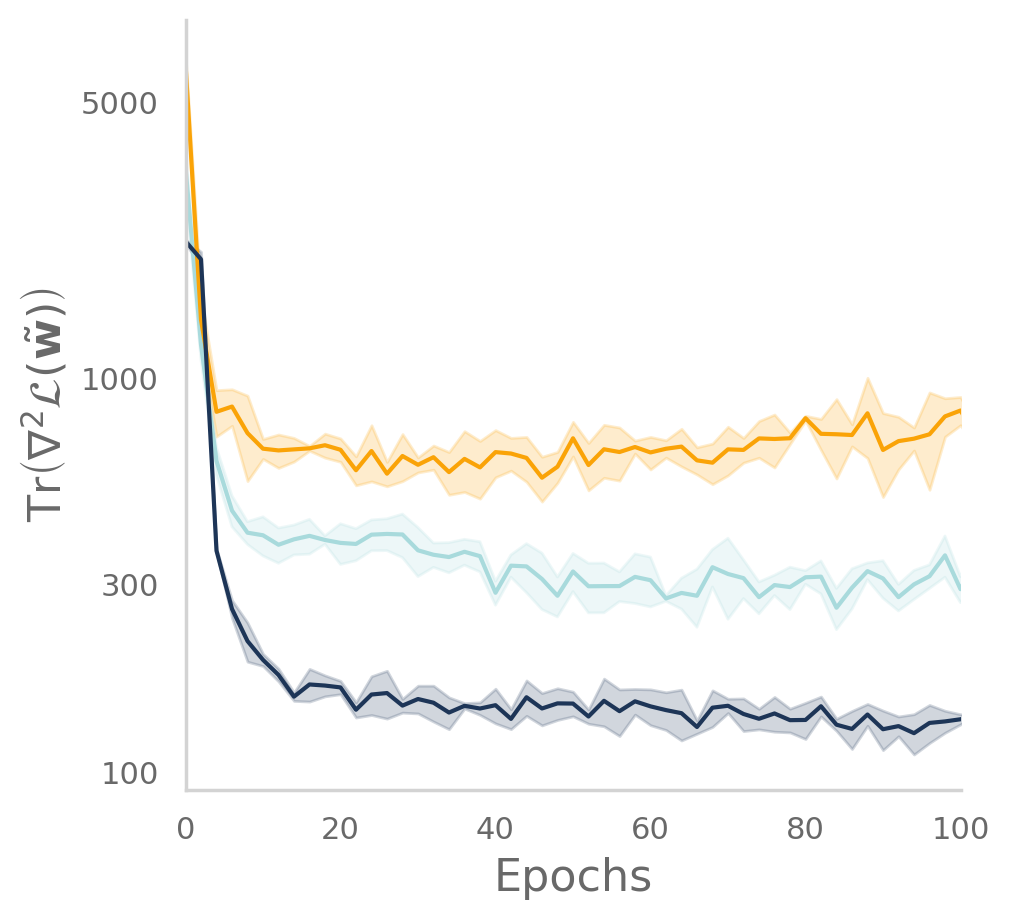

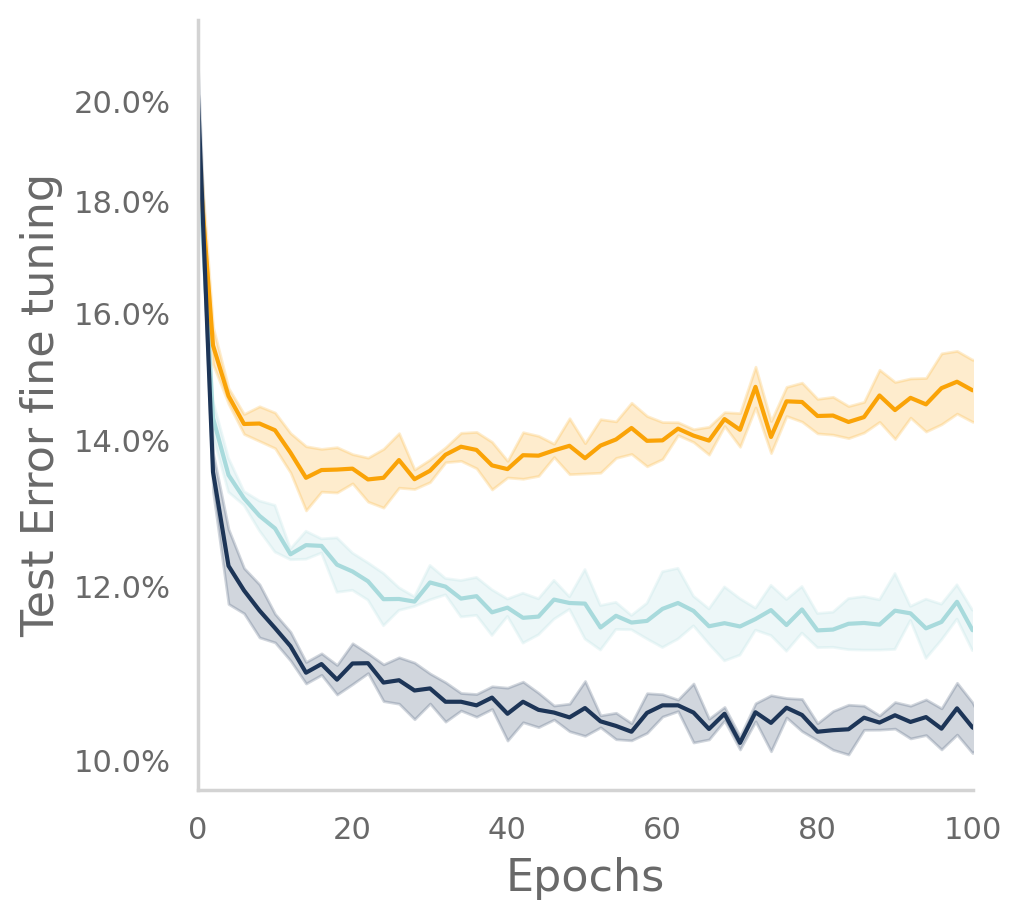

In [33]:
fig_1, ax_1 = plt.subplots(1, 1,  figsize=(5, 5)) 
fig_2, ax_2 = plt.subplots(1, 1,  figsize=(5, 5)) 
colors =  ['#a8dadc', '#faa307','#1d3557' ,  '#e63946' ]
#fig.suptitle('Resnet on CIFAR10')
#axs[0].set_yscale('log')
ax_1.set_yscale('log')
ax_2.set_yscale('log')
ax_1.set_xlabel('Epochs')
ax_2.set_xlabel('Epochs')
ax_1.set_ylabel('Tr'r'$\left(\nabla^2\mathcal{L}(\mathbf{\tilde{w}})\right)$') 
ax_2.set_ylabel('Test Error fine tuning')
ax_1.set_xlim(0,100)
ax_2.set_xlim(0,100)
#ax.set_title("Resnet on CIFAR100")
#colors = pick_colors(p, cmap = 'viridis', dict = True)
for i,(lr,wd) in enumerate(plots_traceh): 
    #test_e = dataframe.loc[(dataframe['metric.name'] == 'Test Error') & (dataframe['run.hparams.lr'] == lr) & (dataframe['run.hparams.random_seed'] == 42) & (dataframe['run.hparams.wd'] == wd) & (dataframe['metric.context.subset'] == 'SDE')]['value'].to_numpy()
    test_e = dataframe5.loc[(dataframe5['metric.name'] == 'Test Error') 
                            & (dataframe5['run.hparams.lr'] == lr) 
                            & (dataframe5['run.hparams.wd'] == wd) 
                            & (dataframe5['metric.context.subset'] != 'SDE')
                            & (dataframe5['metric.context.subset'] != 'ema')][['step','run.hparams.random_seed' ,'value']].sort_values('step')
    trace_h = dataframe5.loc[(dataframe5['metric.name'] == 'trace_H') 
                            & (dataframe5['run.hparams.lr'] == lr) 
                            & (dataframe5['run.hparams.wd'] == wd) 
                            & (dataframe5['metric.context.subset'] != 'SDE')
                            & (dataframe5['metric.context.subset'] != 'ema')][['step','run.hparams.random_seed' ,'value']].sort_values('step')
    #axs[0].plot(l2['value'].to_numpy(), label = f'lr = {lr}, wd = {wd}', color = colors[i])
    test_e_mean = test_e.groupby('step')['value'].mean().to_numpy()[:100]*100
    test_e_std = test_e.groupby('step')['value'].std().to_numpy()[:100]*100
    trace_h_mean = trace_h.groupby('step')['value'].mean().to_numpy()[:100]
    trace_h_std = trace_h.groupby('step')['value'].std().to_numpy()[:100]
    #test_ema = dataframe.loc[(dataframe['metric.name'] == 'Test Error') & (dataframe['run.hparams.lr'] == lr) & (dataframe['run.hparams.random_seed'] == 42) & (dataframe['run.hparams.wd'] == wd) & (dataframe['metric.context.subset'] == 'ema')]['value'].to_numpy()
    #ax.plot(test_e_mean, label = f'lr = {lr}, wd = {wd}', color = colors[i])
    #ax.plot(test_ema, label = f'EMA lr = {lr}, wd = {wd}', color = colors[i], linestyle = '--')
    ax_2.semilogy(np.arange(test_e_mean.shape[0])*2,test_e_mean, label = f'lr = {lr}', color = colors[i])
    ax_1.semilogy(np.arange(trace_h_mean.shape[0])*2,trace_h_mean, label = f'lr = {lr}', color = colors[i])
    ax_2.fill_between(np.arange(test_e_mean.shape[0])*2, test_e_mean + test_e_std,test_e_mean - test_e_std, color = colors[i], alpha=0.2)
    ax_1.fill_between(np.arange(trace_h_mean.shape[0])*2, trace_h_mean + trace_h_std,trace_h_mean - trace_h_std, color = colors[i], alpha=0.2)

#axs[0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
ytick_locs_0 = [100, 300, 1000, 5000]
ytick_locs_1 = [10, 12, 14, 16, 18, 20 ]

# Set the y-tick locations and labels
ax_1.set_yticks(ytick_locs_0)
ax_1.set_yticklabels([str(int(loc)) for loc in ytick_locs_0])

ax_2.set_yticks(ytick_locs_1)
ax_2.set_yticklabels([str(loc) for loc in ytick_locs_1])
ax_2.yaxis.set_major_formatter(mtick.PercentFormatter())
#ax_2.legend()

In [34]:
fig_1.savefig('/tmldata1/fdangelo/understanding-weight-decay/plots_paper/tace_h_cifar_10.pdf', format='pdf', bbox_inches='tight')
fig_2.savefig('/tmldata1/fdangelo/understanding-weight-decay/plots_paper/test_e_ft_cifar10.pdf', format='pdf', bbox_inches='tight')

***
<div align="center"> <h1> Plot on the sphere  <h1> </div>

In [35]:
query_sphere = "run.experiment == 'scale_invariance_sphere'"
df_sphere = my_repo.query_metrics(query_sphere).dataframe()
plot_sphere = [(0.005),(0.003),(0.001)]

  0%|          | 0/767 [00:00<?, ?it/s]

100%|██████████| 767/767 [00:09<00:00, 85.22it/s] 


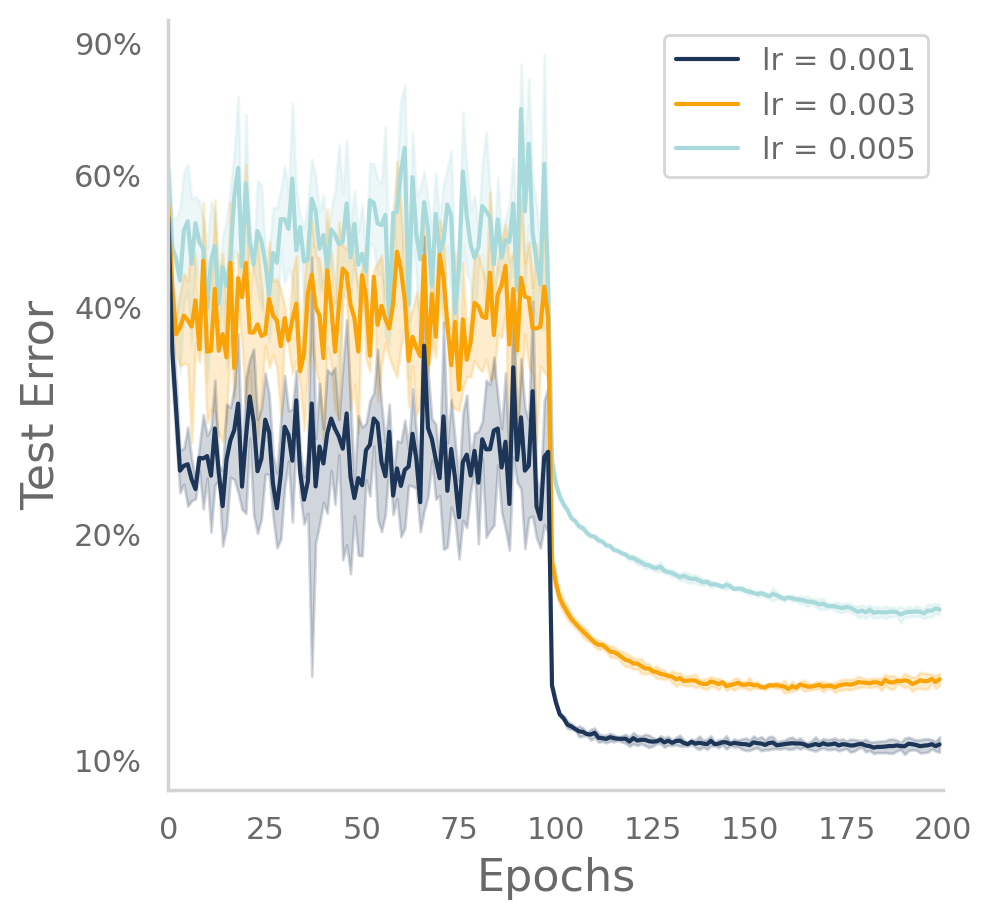

In [36]:
fig_1, ax_1 = plt.subplots(1, 1,  figsize=(5, 5)) 
colors =  ['#a8dadc', '#faa307','#1d3557' ,  '#e63946' ]
#fig.suptitle('Resnet on CIFAR10')
#axs[0].set_yscale('log')
ax_1.set_yscale('log')
ax_1.set_xlabel('Epochs')
ax_1.set_ylabel('Test Error')
ax_1.set_xlim(0,200)
#ax.set_title("Resnet on CIFAR100")
#colors = pick_colors(p, cmap = 'viridis', dict = True)
for i,lr in enumerate(plot_sphere): 
    #test_e = dataframe.loc[(dataframe['metric.name'] == 'Test Error') & (dataframe['run.hparams.lr'] == lr) & (dataframe['run.hparams.random_seed'] == 42) & (dataframe['run.hparams.wd'] == wd) & (dataframe['metric.context.subset'] == 'SDE')]['value'].to_numpy()
    test_e = df_sphere.loc[(df_sphere['metric.name'] == 'Test Error') 
                            & (df_sphere['run.hparams.lr'] == lr) 
                            & (df_sphere['metric.context.subset'] == 'SDE')][['step','run.hparams.random_seed' ,'value']].sort_values('step')
    test_e_mean = test_e.groupby('step')['value'].mean().to_numpy()[:200]*100
    test_e_std = test_e.groupby('step')['value'].std().to_numpy()[:200]*100

    ax_1.semilogy(test_e_mean, label = f'lr = {lr}', color = colors[i])
    ax_1.fill_between(np.arange(test_e_mean.shape[0]), test_e_mean + test_e_std,test_e_mean - test_e_std, color = colors[i], alpha=0.2)

#axs[0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
# ytick_locs_0 = [6, 10, 20, 30, 40]
ytick_locs_1 = [10, 20, 40, 60, 90]

# # # Set the y-tick locations and labels
# # axs[0].set_yticks(ytick_locs_0)
# # axs[0].set_yticklabels([str(int(loc)) for loc in ytick_locs_0])
ax_1.set_yticks(ytick_locs_1)
ax_1.set_yticklabels([str(loc) for loc in ytick_locs_1])
ax_1.yaxis.set_major_formatter(mtick.PercentFormatter())
handles, labels = ax_1.get_legend_handles_labels()
order = [2,1,0]
ax_1.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

In [37]:
fig_1.savefig('/tmldata1/fdangelo/understanding-weight-decay/plots_paper/test_e_sphere.pdf', format='pdf', bbox_inches='tight')

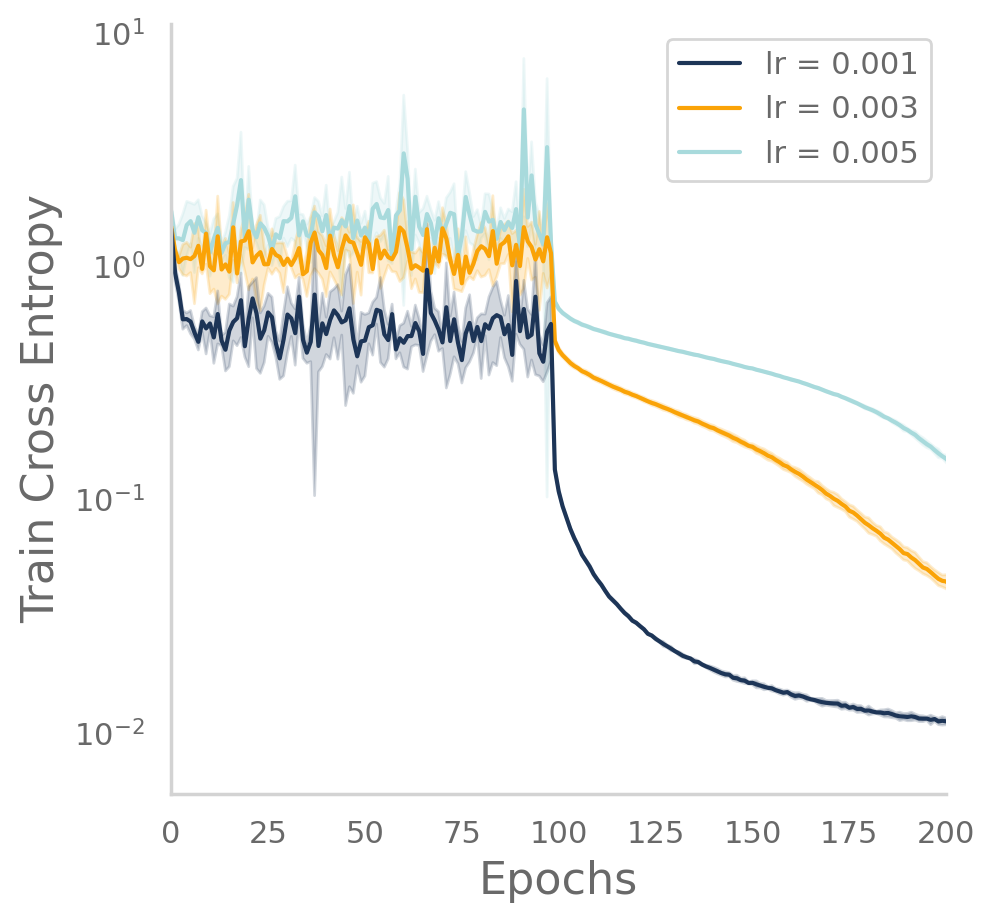

In [39]:
fig_1, ax_1 = plt.subplots(1, 1,  figsize=(5, 5)) 
colors =  ['#a8dadc', '#faa307','#1d3557' ,  '#e63946' ]
#fig.suptitle('Resnet on CIFAR10')
#axs[0].set_yscale('log')
ax_1.set_yscale('log')
ax_1.set_xlabel('Epochs')
ax_1.set_ylabel('Train Cross Entropy')
ax_1.set_xlim(0,200)
#ax.set_title("Resnet on CIFAR100")
#colors = pick_colors(p, cmap = 'viridis', dict = True)
for i,lr in enumerate(plot_sphere): 
    #test_e = dataframe.loc[(dataframe['metric.name'] == 'Test Error') & (dataframe['run.hparams.lr'] == lr) & (dataframe['run.hparams.random_seed'] == 42) & (dataframe['run.hparams.wd'] == wd) & (dataframe['metric.context.subset'] == 'SDE')]['value'].to_numpy()
    test_e = df_sphere.loc[(df_sphere['metric.name'] == 'Train Cross Entropy') 
                            & (df_sphere['run.hparams.lr'] == lr) 
                            & (df_sphere['metric.context.subset'] == 'SDE')][['step','run.hparams.random_seed' ,'value']].sort_values('step')
    test_e_mean = test_e.groupby('step')['value'].mean().to_numpy()
    test_e_std = test_e.groupby('step')['value'].std().to_numpy()

    ax_1.semilogy(test_e_mean, label = f'lr = {lr}', color = colors[i])
    ax_1.fill_between(np.arange(test_e_mean.shape[0]), test_e_mean + test_e_std,test_e_mean - test_e_std, color = colors[i], alpha=0.2)

#axs[0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
# ytick_locs_0 = [6, 10, 20, 30, 40]
# ytick_locs_1 = [10, 20, 40, 60, 90]

# # # # Set the y-tick locations and labels
# # # axs[0].set_yticks(ytick_locs_0)
# # # axs[0].set_yticklabels([str(int(loc)) for loc in ytick_locs_0])
# ax_1.set_yticks(ytick_locs_1)
# ax_1.set_yticklabels([str(loc) for loc in ytick_locs_1])
# ax_1.yaxis.set_major_formatter(mtick.PercentFormatter())
handles, labels = ax_1.get_legend_handles_labels()
order = [2,1,0]
ax_1.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

In [40]:
fig_1.savefig('/tmldata1/fdangelo/understanding-weight-decay/plots_paper/train_CE_sphere.pdf', format='pdf', bbox_inches='tight')

In [41]:
df_sphere2 = df_sphere.loc[(df_sphere['metric.name'] == 'Test Error') & (df_sphere['metric.context.subset'] == 'SDE')][['step','run.hparams.random_seed','run.hparams.lr' ,'value']].sort_values('step')
df_sphere2 = df_sphere2.loc[df_sphere2["step"] == 200].groupby('run.hparams.lr')['value'].mean()

In [50]:
np.column_stack((df_sphere2.index, df_sphere2.values))

array([[1.00000000e-04, 1.39500000e-01],
       [2.50000000e-04, 1.26500000e-01],
       [5.00000000e-04, 1.18700000e-01],
       [7.50000000e-04, 1.08966667e-01],
       [1.00000000e-03, 1.04833333e-01],
       [2.00000000e-03, 1.11333333e-01],
       [3.00000000e-03, 1.27966667e-01],
       [4.00000000e-03, 1.44233333e-01],
       [5.00000000e-03, 1.58500000e-01]])

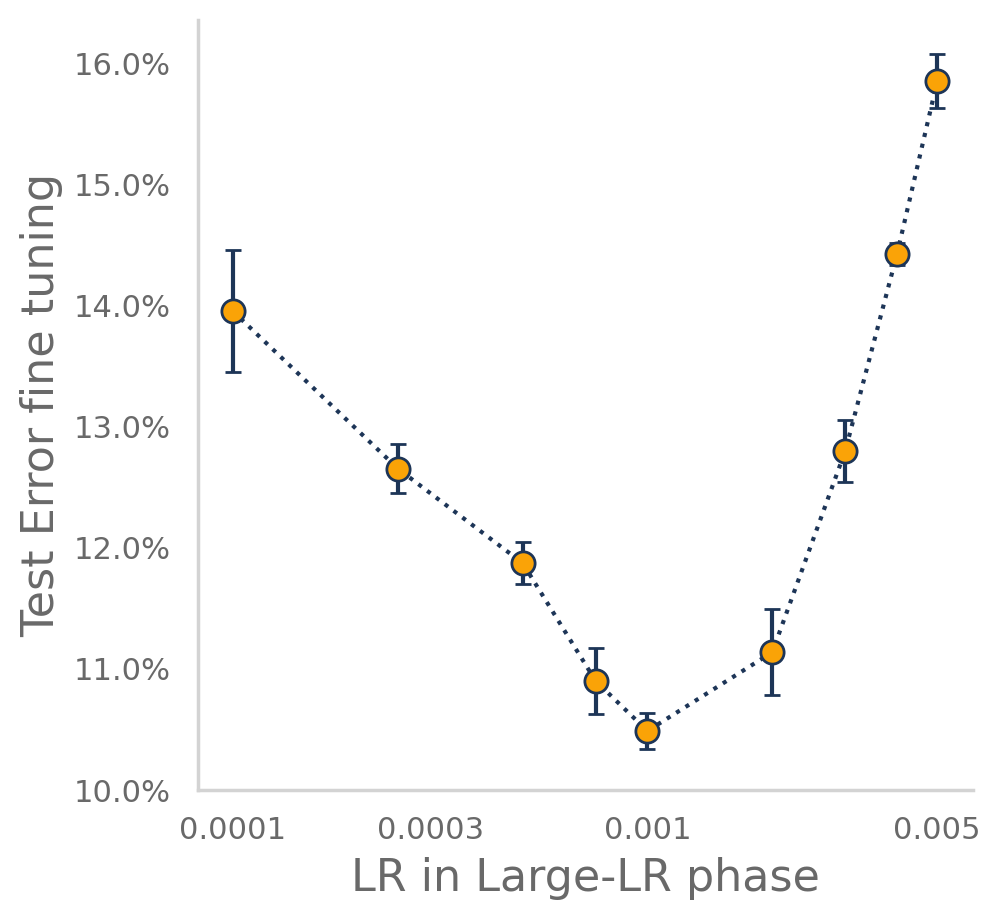

In [42]:
fig_1, ax_1 = plt.subplots(1, 1,  figsize=(5, 5)) 
colors =  ['#a8dadc', '#faa307','#1d3557' ,  '#e63946' ]
#fig.suptitle('Resnet on CIFAR10')
#axs[0].set_yscale('log')
ax_1.set_xscale('log')
ax_1.set_xlabel('LR in Large-LR phase')
ax_1.set_ylabel('Test Error fine tuning')

#test_e = dataframe.loc[(dataframe['metric.name'] == 'Test Error') & (dataframe['run.hparams.lr'] == lr) & (dataframe['run.hparams.random_seed'] == 42) & (dataframe['run.hparams.wd'] == wd) & (dataframe['metric.context.subset'] == 'SDE')]['value'].to_numpy()
test_e = df_sphere.loc[(df_sphere['metric.name'] == 'Test Error') & (df_sphere['metric.context.subset'] == 'SDE')][['step','run.hparams.random_seed','run.hparams.lr' ,'value']].sort_values('step')
test_e_mean = test_e.groupby('step')['value'].mean().to_numpy()[:200]*100
test_e_std = test_e.groupby('step')['value'].std().to_numpy()[:200]*100
df_sphere2 = df_sphere.loc[(df_sphere['metric.name'] == 'Test Error') & (df_sphere['metric.context.subset'] == 'SDE')][['step','run.hparams.random_seed','run.hparams.lr' ,'value']].sort_values('step')
means = df_sphere2.loc[df_sphere2["step"] == 200].groupby('run.hparams.lr')['value'].mean()*100
stds = df_sphere2.loc[df_sphere2["step"] == 200].groupby('run.hparams.lr')['value'].std()*100
ax_1.errorbar(means.index,means.values,stds.values, color = colors[2], zorder = 0, capsize=3, ls='dotted')
ax_1.scatter(means.index,means.values, color = colors[1], edgecolor= colors[2], s = 70, zorder = 1)

#axs[0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
ytick_locs_0 = [10,11,12,13,14,15,16]
xtick_locs_0 = [0.0001, 0.0003, 0.001, 0.005]

# # # Set the y-tick locations and labels
# # axs[0].set_yticks(ytick_locs_0)
# # axs[0].set_yticklabels([str(int(loc)) for loc in ytick_locs_0])
ax_1.set_yticks(ytick_locs_0)
ax_1.set_yticklabels([str(loc) for loc in ytick_locs_0])
ax_1.set_xticks(xtick_locs_0)
ax_1.set_xticklabels([str(loc) for loc in xtick_locs_0])
ax_1.yaxis.set_major_formatter(mtick.PercentFormatter())
#ax_2.legend()

In [43]:
fig_1.savefig('/tmldata1/fdangelo/understanding-weight-decay/plots_paper/u_shape_sphere.pdf', format='pdf', bbox_inches='tight')

In [44]:
querytraceh_sphere = "run.experiment == 'scale_invariance_sphere_trace_new'"
df_trace_sphere = my_repo.query_metrics(querytraceh_sphere).dataframe()

  0%|          | 2/767 [00:01<08:55,  1.43it/s]

100%|██████████| 767/767 [00:22<00:00, 33.92it/s] 


In [45]:
plots_traceh = [(0.005,0.0),(0.003,0.0),(0.001,0.0)]

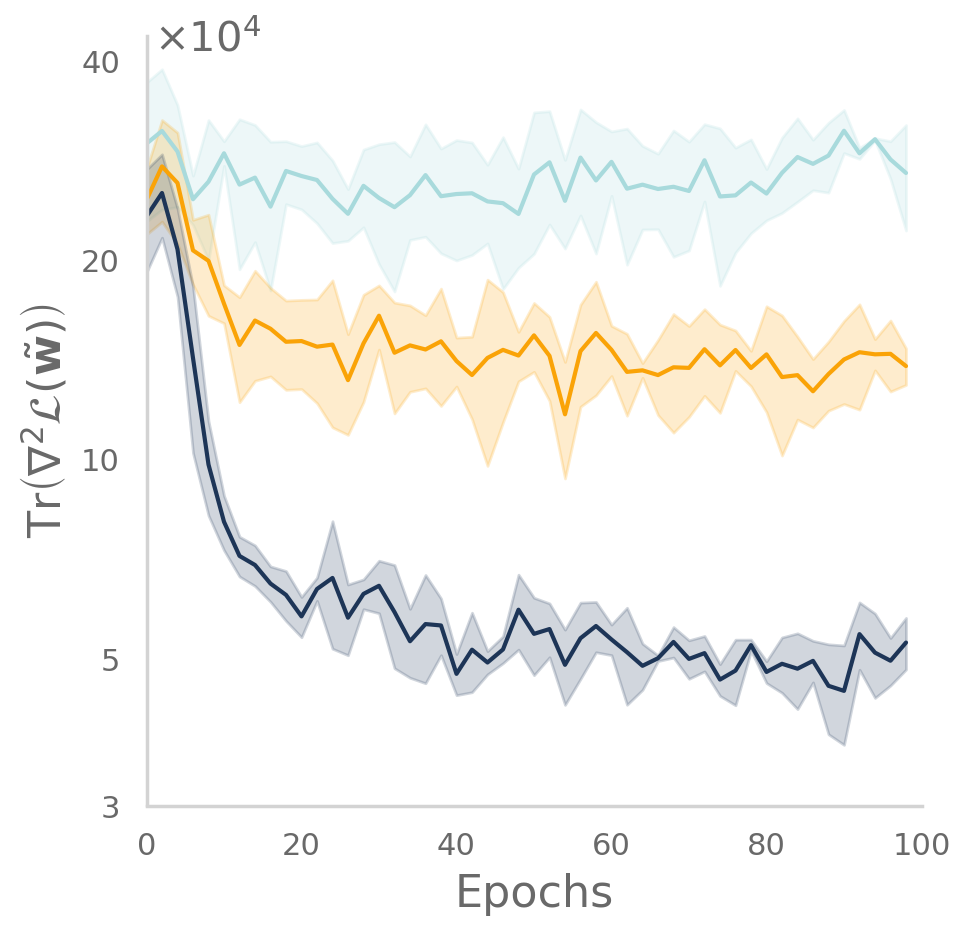

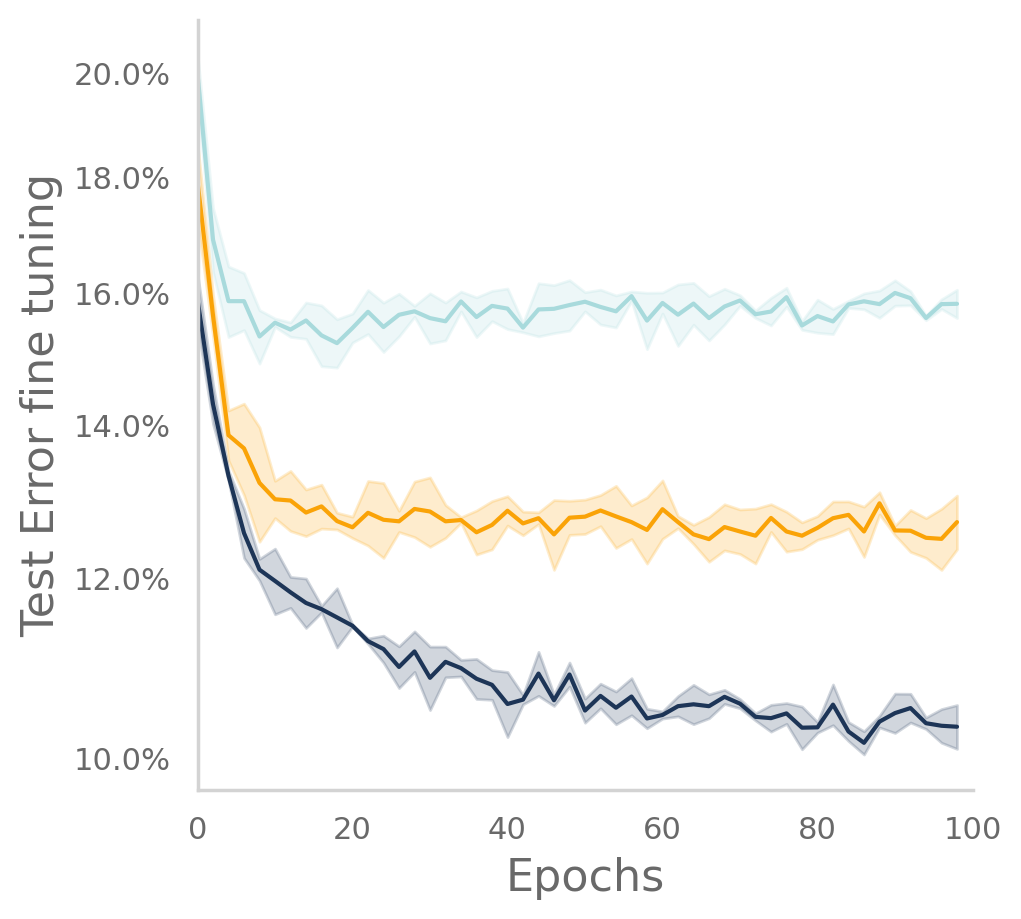

In [46]:
fig_1, ax_1 = plt.subplots(1, 1,  figsize=(5, 5)) 
fig_2, ax_2 = plt.subplots(1, 1,  figsize=(5, 5)) 
colors =  ['#a8dadc', '#faa307','#1d3557' ,  '#e63946' ]
#fig.suptitle('Resnet on CIFAR10')
#axs[0].set_yscale('log')
ax_1.set_yscale('log')
ax_2.set_yscale('log')
ax_1.set_xlabel('Epochs')
ax_2.set_xlabel('Epochs')
ax_1.set_ylabel('Tr'r'$\left(\nabla^2\mathcal{L}(\mathbf{\tilde{w}})\right)$') 
ax_2.set_ylabel('Test Error fine tuning')
ax_1.set_xlim(0,100)
ax_2.set_xlim(0,100)
#ax.set_title("Resnet on CIFAR100")
#colors = pick_colors(p, cmap = 'viridis', dict = True)
for i,(lr,wd) in enumerate(plots_traceh): 
    #test_e = dataframe.loc[(dataframe['metric.name'] == 'Test Error') & (dataframe['run.hparams.lr'] == lr) & (dataframe['run.hparams.random_seed'] == 42) & (dataframe['run.hparams.wd'] == wd) & (dataframe['metric.context.subset'] == 'SDE')]['value'].to_numpy()
    test_e = df_trace_sphere.loc[(df_trace_sphere['metric.name'] == 'Test Error') 
                            & (df_trace_sphere['run.hparams.lr'] == lr) 
                            & (df_trace_sphere['run.hparams.wd'] == wd) 
                            & (df_trace_sphere['metric.context.subset'] != 'SDE')
                            & (df_trace_sphere['metric.context.subset'] != 'ema')][['step','run.hparams.random_seed' ,'value']].sort_values('step')
    trace_h = df_trace_sphere.loc[(df_trace_sphere['metric.name'] == 'trace_H') 
                            & (df_trace_sphere['run.hparams.lr'] == lr) 
                            & (df_trace_sphere['run.hparams.wd'] == wd) 
                            & (df_trace_sphere['metric.context.subset'] != 'SDE')
                            & (df_trace_sphere['metric.context.subset'] != 'ema')][['step','run.hparams.random_seed' ,'value']].sort_values('step')
    #axs[0].plot(l2['value'].to_numpy(), label = f'lr = {lr}, wd = {wd}', color = colors[i])
    test_e_mean = test_e.groupby('step')['value'].mean().to_numpy()*100
    test_e_std = test_e.groupby('step')['value'].std().to_numpy()*100
    trace_h_mean = trace_h.groupby('step')['value'].mean().to_numpy()/1e4
    trace_h_std = trace_h.groupby('step')['value'].std().to_numpy()/1e4
    #test_ema = dataframe.loc[(dataframe['metric.name'] == 'Test Error') & (dataframe['run.hparams.lr'] == lr) & (dataframe['run.hparams.random_seed'] == 42) & (dataframe['run.hparams.wd'] == wd) & (dataframe['metric.context.subset'] == 'ema')]['value'].to_numpy()
    #ax.plot(test_e_mean, label = f'lr = {lr}, wd = {wd}', color = colors[i])
    #ax.plot(test_ema, label = f'EMA lr = {lr}, wd = {wd}', color = colors[i], linestyle = '--')
    ax_2.semilogy(np.arange(test_e_mean.shape[0])*2,test_e_mean, label = f'lr = {lr}', color = colors[i])
    ax_1.semilogy(np.arange(trace_h_mean.shape[0])*2,trace_h_mean, label = f'lr = {lr}', color = colors[i])
    ax_2.fill_between(np.arange(test_e_mean.shape[0])*2, test_e_mean + test_e_std,test_e_mean - test_e_std, color = colors[i], alpha=0.2)
    ax_1.fill_between(np.arange(trace_h_mean.shape[0])*2, trace_h_mean + trace_h_std,trace_h_mean - trace_h_std, color = colors[i], alpha=0.2)

#axs[0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
ytick_locs_1 = [3, 5, 10, 20, 40]
ytick_locs_2 = [10, 12, 14, 16, 18, 20 ]

# # Set the y-tick locations and labels
# axs[0].set_yticks(ytick_locs_0)
# axs[0].set_yticklabels([str(int(loc)) for loc in ytick_locs_0])
ax_1.set_yticks(ytick_locs_1)
ax_1.set_yticklabels([str(loc) for loc in ytick_locs_1])
ax_1.annotate(r'$\times$10$^{4}$',xy=(.01, .98), xycoords='axes fraction', fontsize = 15)
ax_2.set_yticks(ytick_locs_2)
ax_2.set_yticklabels([str(loc) for loc in ytick_locs_2])
ax_2.yaxis.set_major_formatter(mtick.PercentFormatter())
#ax_2.legend()

In [77]:
fig_1.savefig('/tmldata1/fdangelo/understanding-weight-decay/plots_paper/tace_h_cifar_10_sphere.pdf', format='pdf', bbox_inches='tight')
fig_2.savefig('/tmldata1/fdangelo/understanding-weight-decay/plots_paper/test_e_ft_cifar10_sphere.pdf', format='pdf', bbox_inches='tight')